Installing Libraries

In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn 

Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Loading Dataset

In [6]:
# Load your dataset
df = pd.read_csv(r'Documents\internpulse\_cancer_dataset_uae.csv')
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


Data Processing

In [7]:
#checking  columns and corresponding data types
#Date info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [8]:
#checking  columns and corresponding data types
#Date info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [9]:
#checking duplicate
df.duplicated().sum()

0

In [10]:
df=df.fillna('')
df

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,,,Non-Smoker,,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,,,Smoker,,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,,,Non-Smoker,,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,,,Former Smoker,,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,,,Former Smoker,,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,,,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,,,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,,,Non-Smoker,,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,,,Smoker,Hypertension,European,68,193


Exploratory Data Analysis (EDA)

Recovery rate per year

In [11]:
df['Outcome'].value_counts()

Outcome
Recovered          4931
Under Treatment    4077
Deceased            992
Name: count, dtype: int64

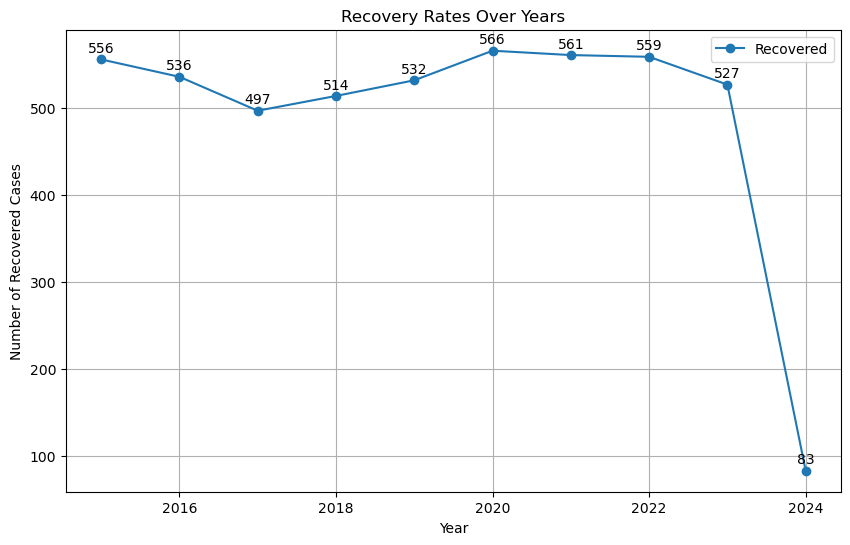

In [12]:
# Assuming 'df' is your DataFrame and 'Outcome' column contains 'Recovered'
# and 'Diagnosis_Date' is the date column

# Convert 'Diagnosis_Date' to datetime objects, handling errors gracefully
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce')

# Extract the year
df['Year'] = df['Diagnosis_Date'].dt.year

# Group by year and count the occurrences of each outcome
outcome_counts_by_year = df.groupby(['Year', 'Outcome']).size().unstack(fill_value=0)

# Calculate the total count per year
outcome_counts_by_year['Total'] = outcome_counts_by_year.sum(axis=1)

# Calculate the proportion of recovered cases
outcome_counts_by_year['Recovered_Proportion'] = outcome_counts_by_year['Recovered'] / outcome_counts_by_year['Total']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(outcome_counts_by_year.index, outcome_counts_by_year['Recovered'], marker='o', label='Recovered')


# Annotate each point on the line plot with the count
for x, y in zip(outcome_counts_by_year.index, outcome_counts_by_year['Recovered']):
  plt.annotate(str(y), xy=(x, y), textcoords='offset points', xytext=(0, 5), ha='center')

plt.xlabel('Year')
plt.ylabel('Number of Recovered Cases')
plt.title('Recovery Rates Over Years')
plt.legend()
plt.grid(True)
plt.show()

Recovery rate per cancer type

In [14]:
df['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

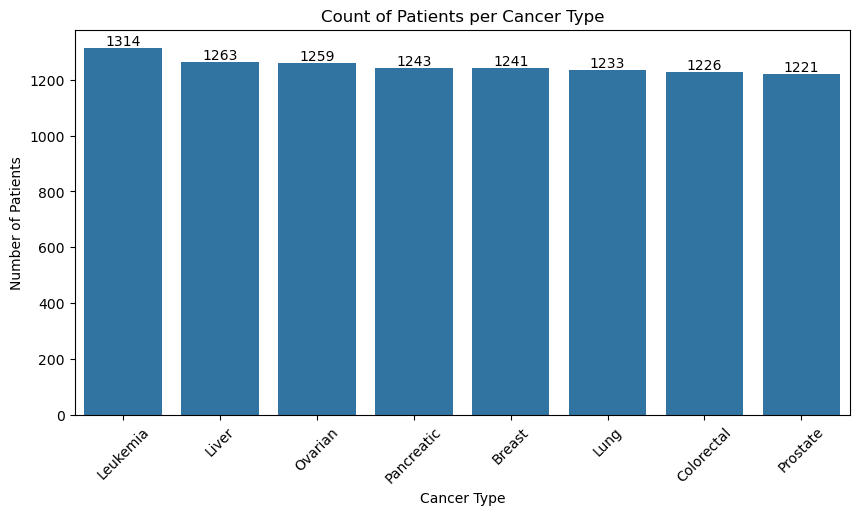

In [15]:
# Assuming 'df' is your DataFrame and 'Outcome' column contains 'Recovered'
cancer_type_counts = df['Cancer_Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=cancer_type_counts.index, y=cancer_type_counts.values)
plt.title('Count of Patients per Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

# Annotate bars with their corresponding counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')


plt.show()

Smoking Status vs Outcome

In [16]:
df['Smoking_Status'].value_counts()

Smoking_Status
Non-Smoker       5038
Smoker           3045
Former Smoker    1917
Name: count, dtype: int64

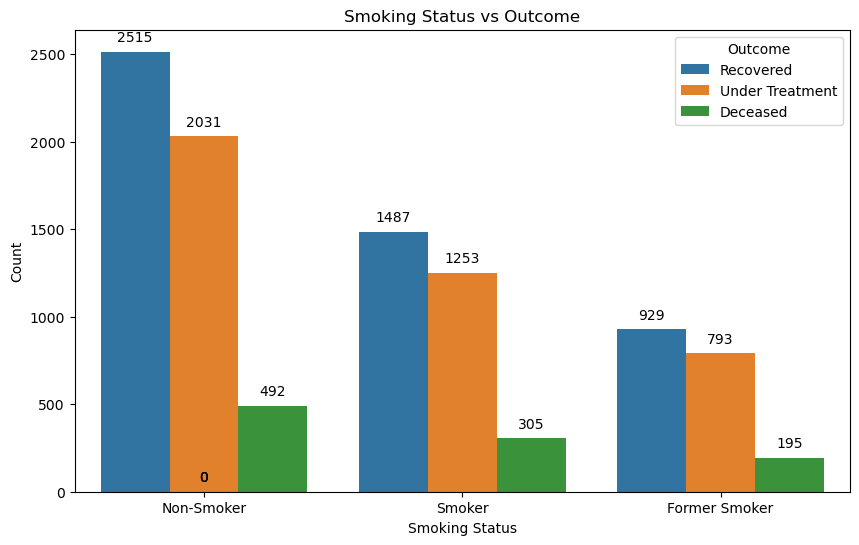

In [17]:
# Smoking Status vs Outcome
plt.figure(figsize=(10, 6))  # Increased figure size for better readability
smoking_status_counts = df['Smoking_Status'].value_counts()
ax = sns.countplot(x='Smoking_Status', data=df, hue='Outcome')
plt.title('Smoking Status vs Outcome')
plt.xlabel('Smoking Status')
plt.ylabel('Count')


# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

top 5 most cancer types by Recovery Rate

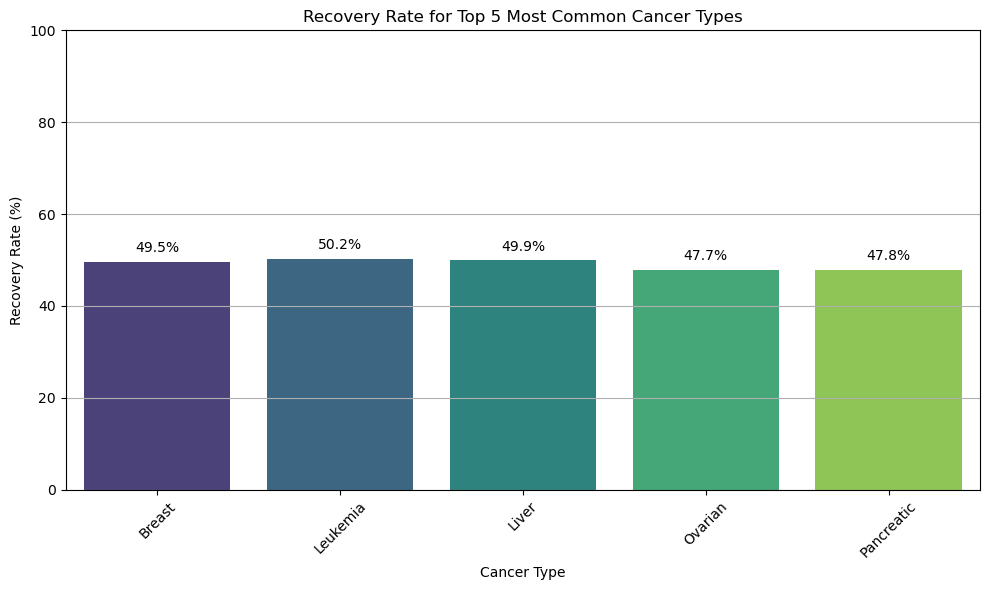

In [18]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Assuming your DataFrame is named `df`
# Step 1: Get the top 5 most common cancer types
top5_cancers = df['Cancer_Type'].value_counts().nlargest(5).index.tolist()

# Step 2: Filter data for only the top 5 cancer types
df_top5 = df[df['Cancer_Type'].isin(top5_cancers)]

# Step 3: Calculate recovery rate (assuming Outcome == 'Recovered' indicates recovery)
recovery_counts = df_top5.groupby('Cancer_Type')['Outcome'].value_counts().unstack(fill_value=0)
recovery_rates = (recovery_counts['Recovered'] / recovery_counts.sum(axis=1)) * 100

# Step 4: Plot recovery rate for each of the top 5 cancer types
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=recovery_rates.index, y=recovery_rates.values, palette='viridis')
plt.title('Recovery Rate for Top 5 Most Common Cancer Types')
plt.ylabel('Recovery Rate (%)')
plt.xlabel('Cancer Type')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate bars with recovery rates (percentage)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Predictive Modeling (Cancer Stage Prediction)

In [19]:
# Encode categorical columns
cat_cols = ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 'Treatment_Type',
            'Outcome', 'Smoking_Status', 'Comorbidities', 'Ethnicity']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
# Feature engineering: BMI
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

In [21]:
# Normalize numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Weight', 'Height', 'BMI']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [22]:
# Features & Target
X = df[['Age', 'Gender', 'Nationality', 'Ethnicity', 'Smoking_Status', 
        'Comorbidities', 'Cancer_Type', 'BMI']]
y = df['Cancer_Stage']

# Encode target stage if not already numeric
y = le.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[124 176 156  26]
 [138 236 230  41]
 [ 95 215 228  39]
 [ 54 115 107  20]]
              precision    recall  f1-score   support

           0       0.30      0.26      0.28       482
           1       0.32      0.37      0.34       645
           2       0.32      0.40      0.35       577
           3       0.16      0.07      0.09       296

    accuracy                           0.30      2000
   macro avg       0.27      0.27      0.27      2000
weighted avg       0.29      0.30      0.29      2000



Clustering Analysis

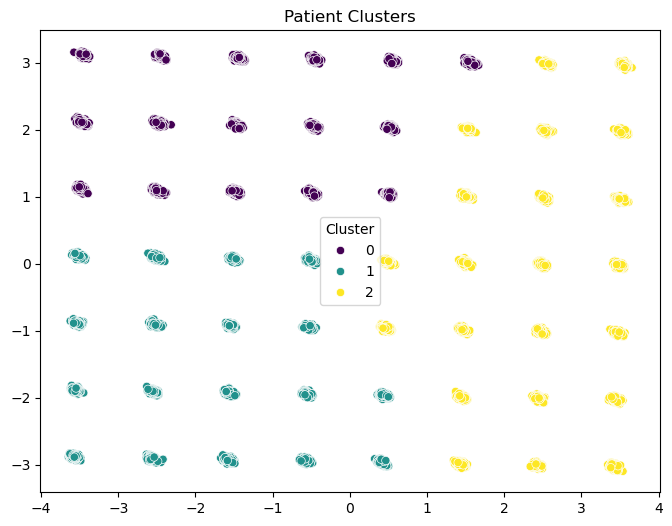

In [24]:
# Assuming df_1 is already loaded as in your previous code
df = df.copy() # Create a copy to avoid modifying the original DataFrame

# Identify and handle non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df = df.drop(non_numeric_cols, axis=1) # Remove non-numeric columns


# Drop target variables
cluster_df = df.drop(['Cancer_Stage', 'Outcome', 'Year'], axis=1, errors='ignore')

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(cluster_df)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_df)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("Patient Clusters")
plt.show()